# Lab Assignment 2:  KNN Classification
Implement the KNN classifier using the IRIS dataset.  
Use a test set of 20% of the original dataset. Use Euclidean distance as the distance metric.
Implement the classifier for K=3 and 5. Please do not use built-in functions.
Perform the classification with and without cross-validation and analyse the results. For k-fold cross-validation, assume k=10.
Evaluate the classifier using the following metrics: Precision, Recall, F1-score, Accuracy and Confusion Matrix.
Once you have implemented the KNN classifier without using the built-in function, compare its results with using the built-in function.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
iris= files.upload()

Saving iris.data to iris.data


In [ ]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']

In [ ]:
data = pd.read_csv ('iris.data', names= data_names)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data["label"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


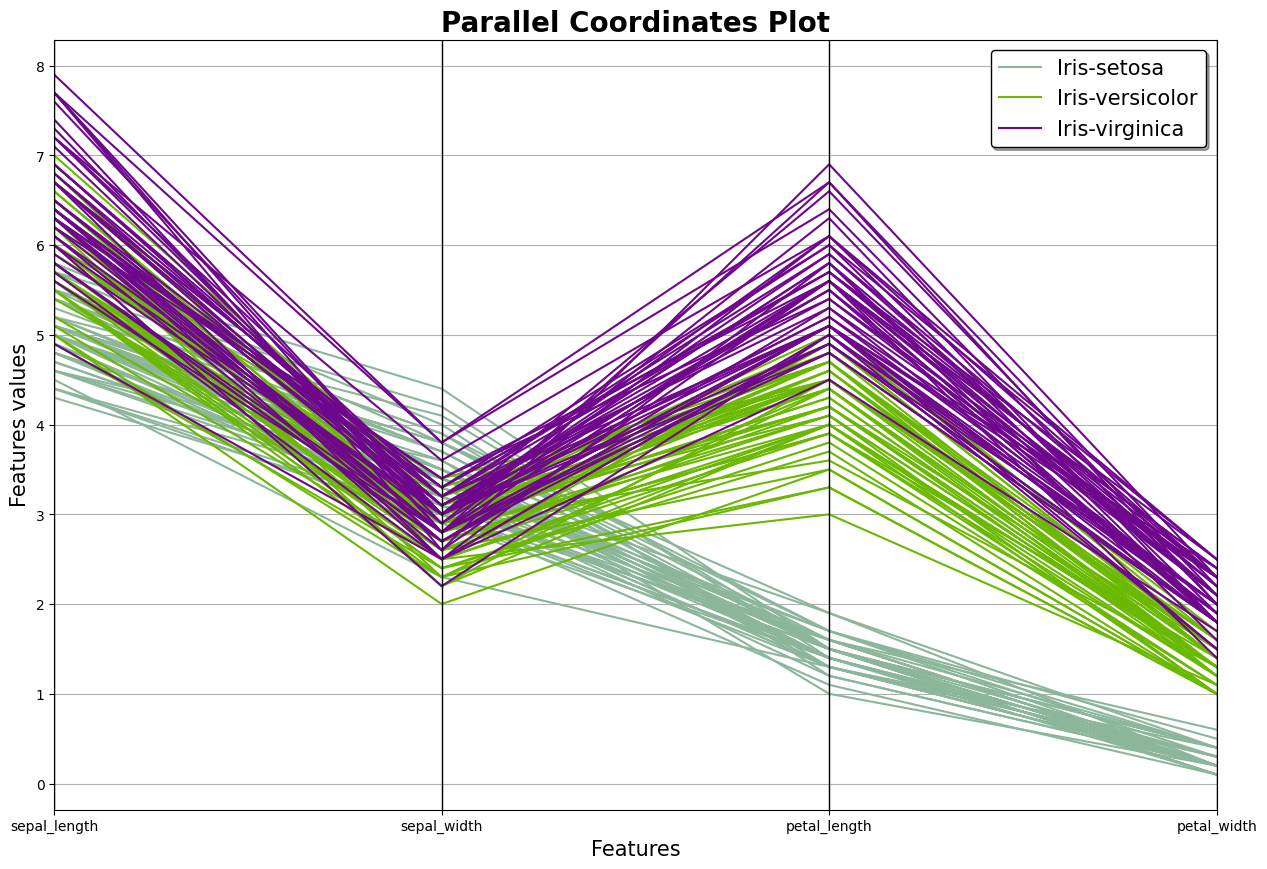

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
parallel_coordinates(data, "label")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

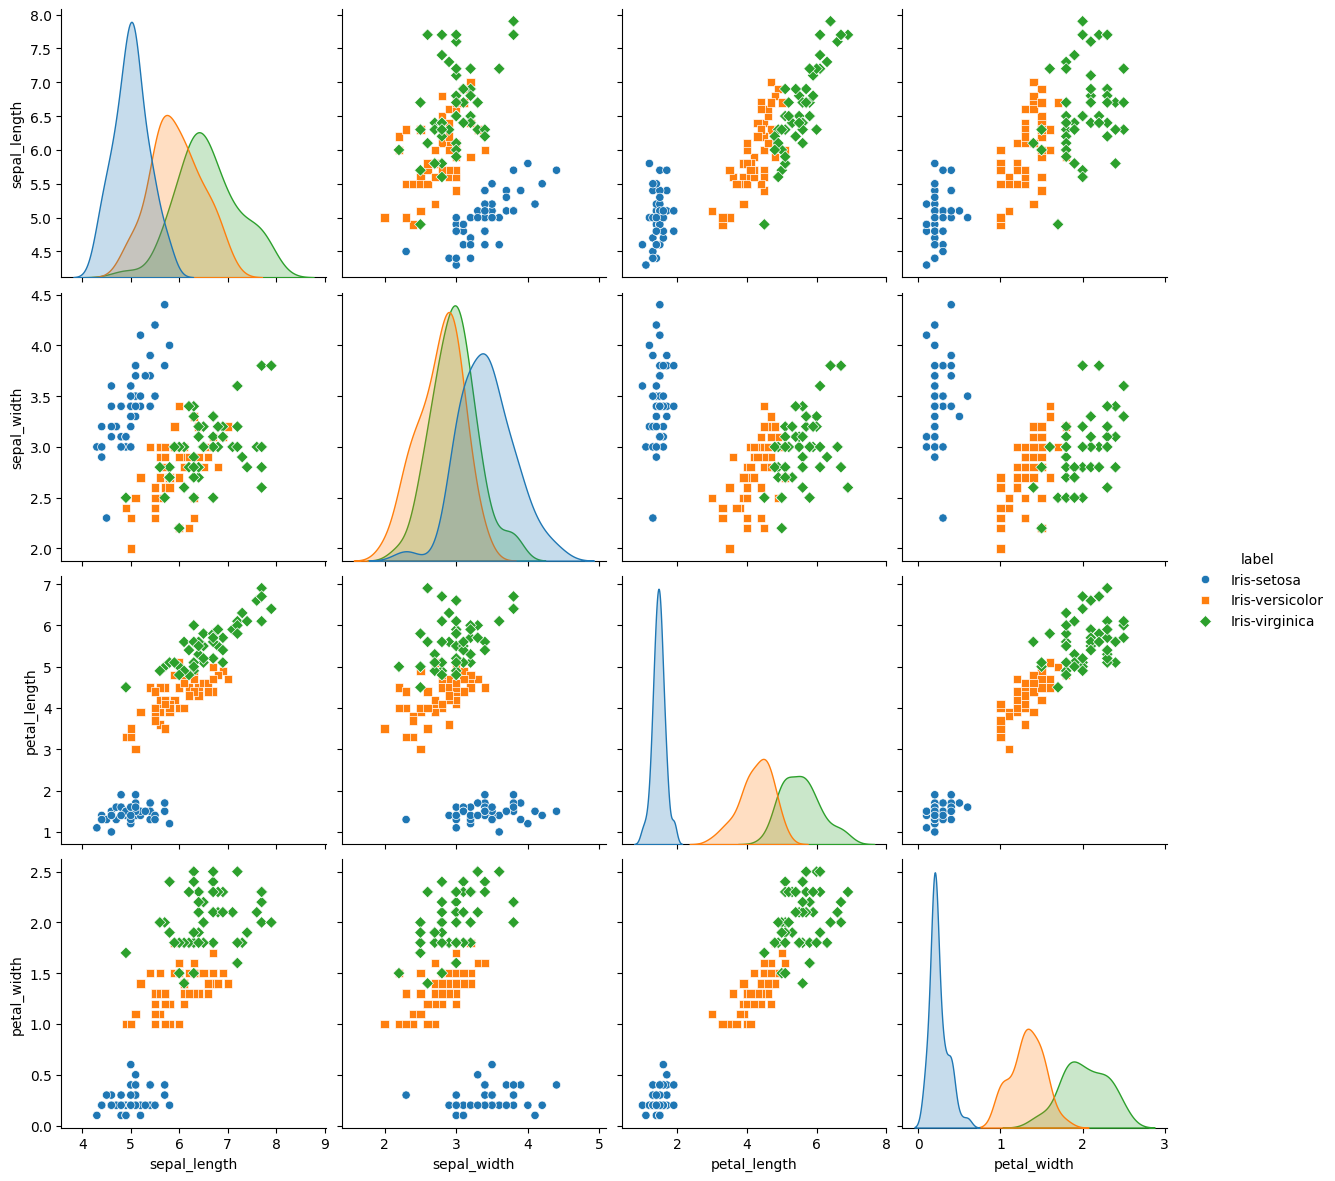

In [ ]:
plt.figure()
sns.pairplot(data, hue = "label", height=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

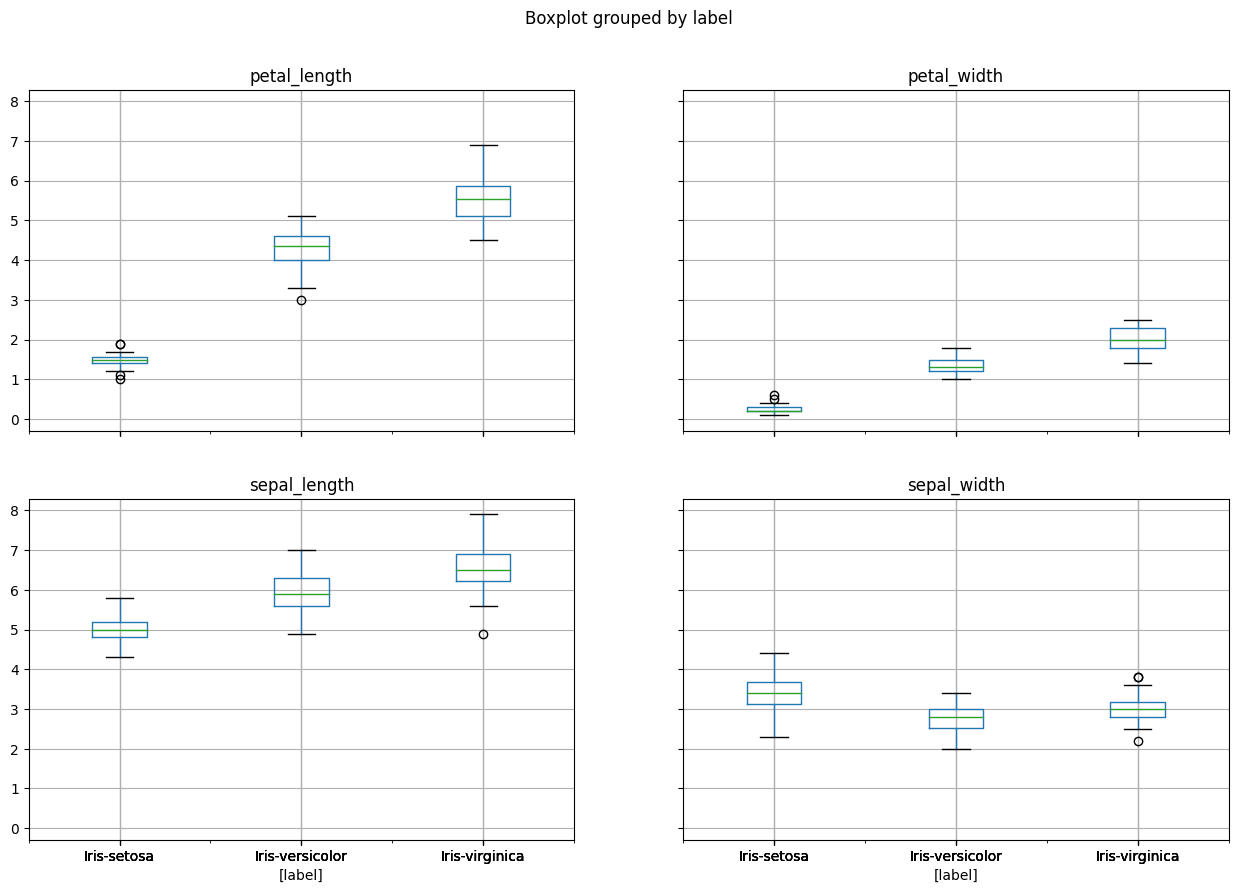

In [ ]:
plt.figure()
data.boxplot(by="label", figsize=(15, 10))
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [ ]:
x= data.iloc[:, :-1]
y= data.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True,
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [ ]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [ ]:
scaler= Normalizer().fit(x_train)
normalized_x_train= scaler.transform(x_train)
normalized_x_test= scaler.transform(x_test)

In [ ]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

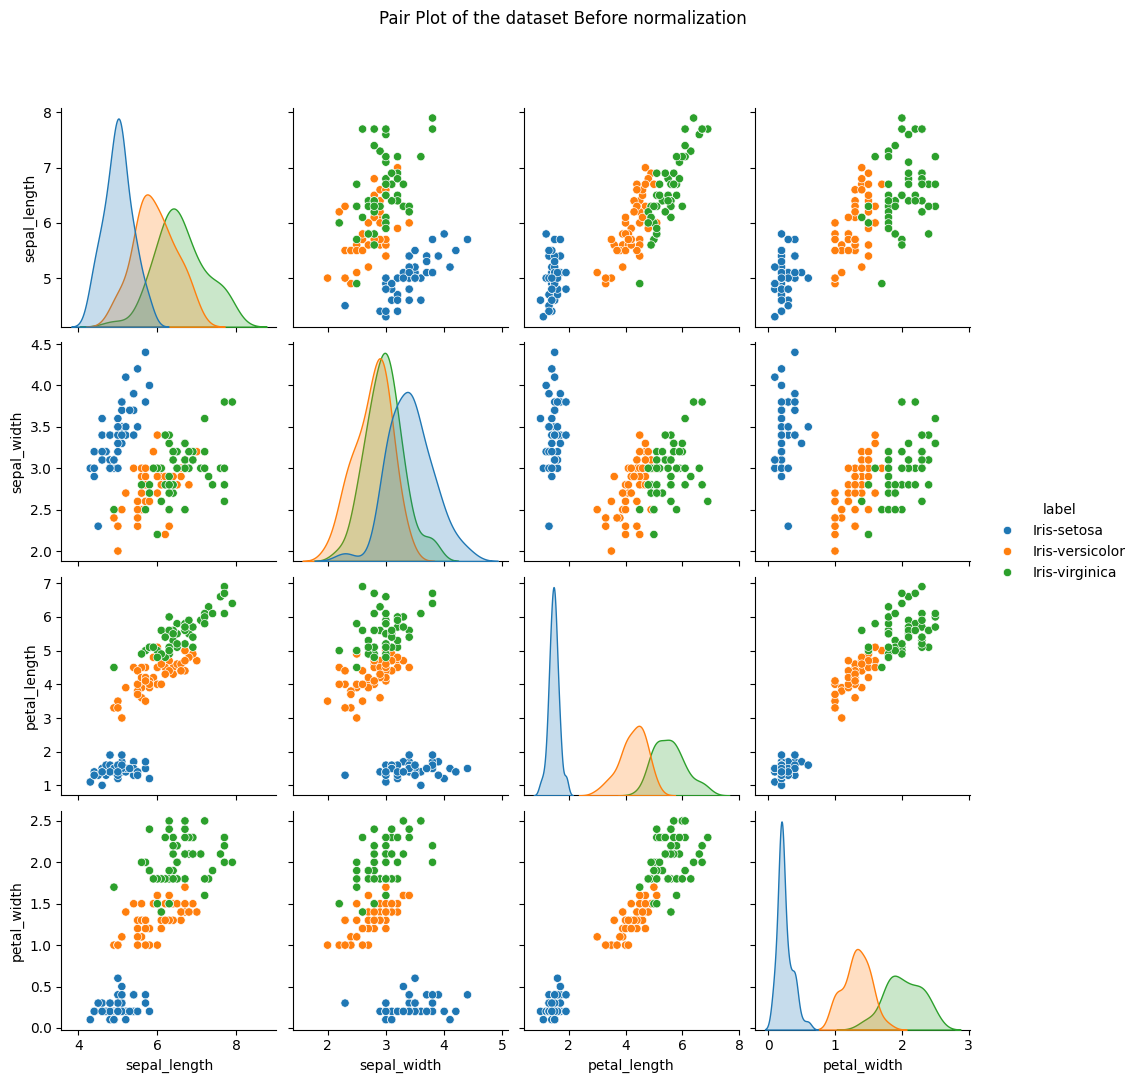

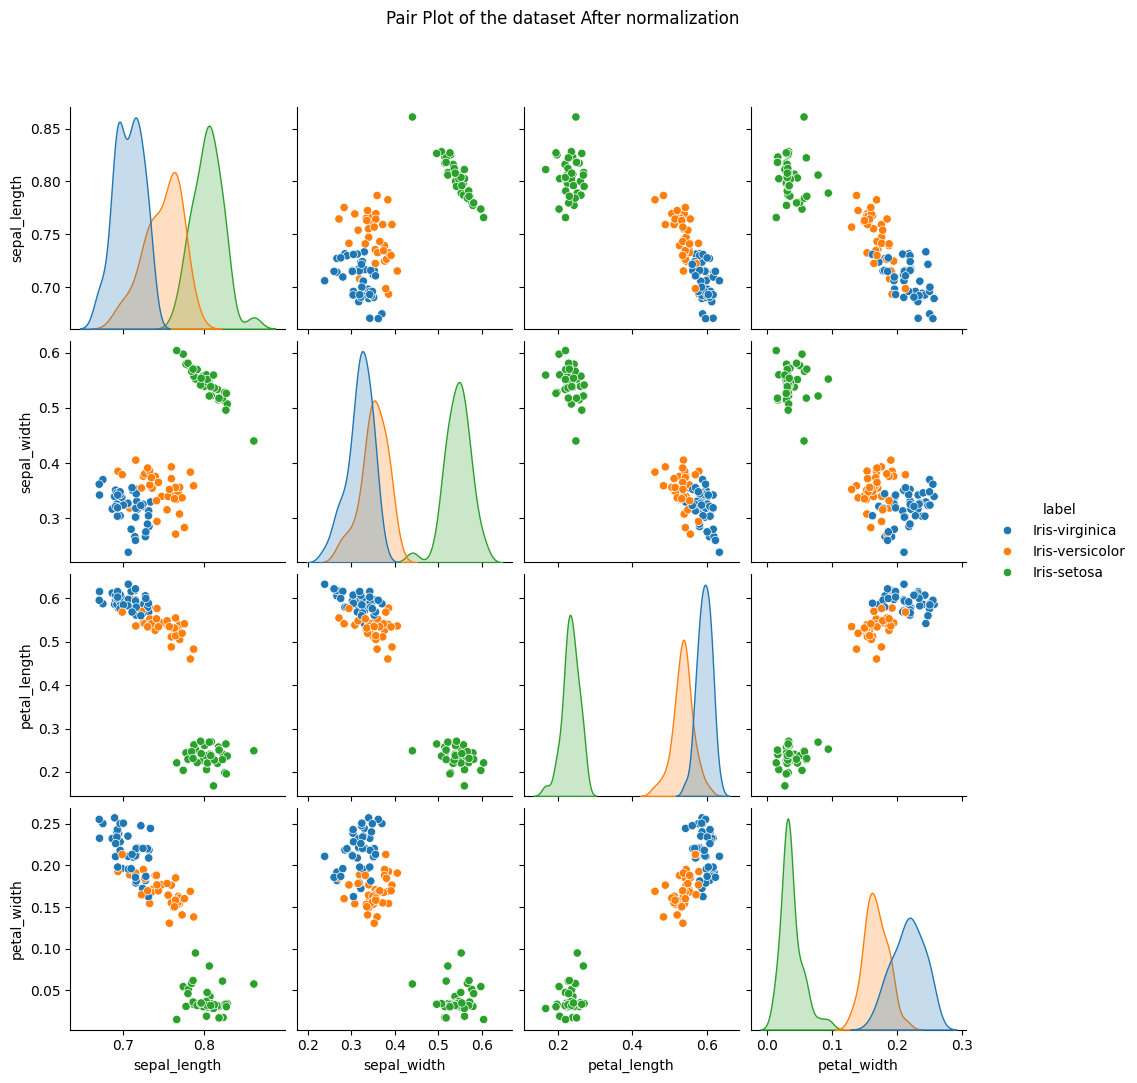

In [ ]:
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}
before= sns.pairplot(data.replace({'label': di}), hue= 'label')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)
iris_df_2 = pd.DataFrame(data=np.c_[normalized_x_train, y_train], columns=data_names)
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'label':di}), hue= 'label')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

#KNN

In [ ]:
def euclidean_distance(x_train, x_test_point):
  distances= []
  for i in range(len(x_train)):
      current_train_point= x_train[i]
      current_distance= 0
      for j in range(len(current_train_point)):
          current_distance += (current_train_point[j] - x_test_point[j]) **2
      current_distance= np.sqrt(current_distance)
      distances.append(current_distance)
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [ ]:
def k_nearest_neighbors(distance_point, K):
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)
    df_nearest= df_nearest[:K]
    return df_nearest

In [ ]:
def class_label(df_nearest, y_train):
    counter_vote= Counter(y_train[df_nearest.index])
    y_pred= counter_vote.most_common()[0][0]
    return y_pred

In [ ]:
def custom_KNN(x_train, y_train, x_test, K):
    y_pred=[]
    for x_test_point in x_test:
      distance_point  = euclidean_distance(x_train, x_test_point)
      df_nearest_point= k_nearest_neighbors(distance_point, K)
      y_pred_point    = class_label(df_nearest_point, y_train)
      y_pred.append(y_pred_point)
    return y_pred

# K=3

In [ ]:
K=3
y_pred_custom= custom_KNN(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_custom)

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa']


In [ ]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [ ]:
print(np.array_equal(y_pred_sklearn, y_pred_custom))

True


In [ ]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_custom)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9666666666666667
The accuracy of sklearn implementation is 0.9666666666666667


# K fold cross validation

In [ ]:
n_splits= 10
kf= KFold(n_splits= n_splits)

k=3
accuracy_fold= 0
for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train):
    normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx]
    y_train_fold= y_train[normalized_x_train_fold_idx]

    normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
    y_valid_fold= y_train[normalized_x_valid_fold_idx]
    y_pred_fold= custom_KNN(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

    accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold)
accuracy_fold= accuracy_fold/ n_splits
print(accuracy_fold)

0.9666666666666666


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

precision = precision_score(y_test, y_pred_custom, average='weighted')

recall = recall_score(y_test, y_pred_custom, average='weighted')

f1 = f1_score(y_test, y_pred_custom, average='weighted')

accuracy = accuracy_score(y_test, y_pred_custom)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Precision: 0.9714
Recall: 0.9667
F1-score: 0.9673
Accuracy: 0.9667


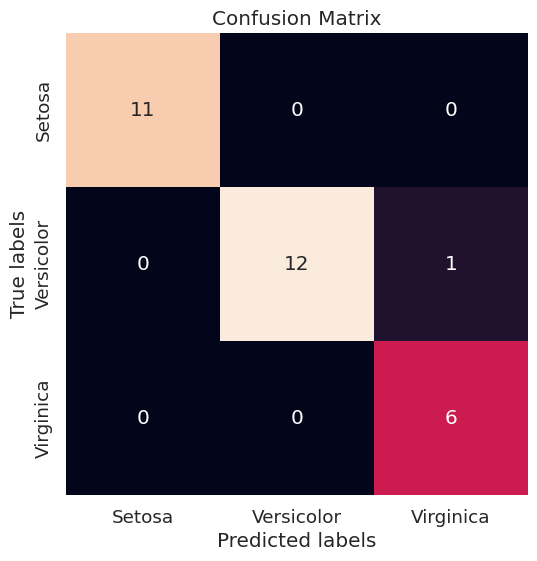

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_custom)
class_names= ['Setosa', 'Versicolor', 'Virginica']
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=False, square=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# K=5

In [ ]:
K=5
y_pred_custom= custom_KNN(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_custom)

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa']


In [ ]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [ ]:
print(np.array_equal(y_pred_sklearn, y_pred_custom))

True


In [ ]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_custom)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 1.0
The accuracy of sklearn implementation is 1.0


In [ ]:
n_splits= 10
kf= KFold(n_splits= n_splits)

k=5
accuracy_fold= 0
for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train):
    normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx]
    y_train_fold= y_train[normalized_x_train_fold_idx]

    normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
    y_valid_fold= y_train[normalized_x_valid_fold_idx]
    y_pred_fold= custom_KNN(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

    accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold)
accuracy_fold= accuracy_fold/ n_splits
print(accuracy_fold)

0.9666666666666666


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

precision = precision_score(y_test, y_pred_custom, average='weighted')

recall = recall_score(y_test, y_pred_custom, average='weighted')

f1 = f1_score(y_test, y_pred_custom, average='weighted')

accuracy = accuracy_score(y_test, y_pred_custom)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Accuracy: 1.0000


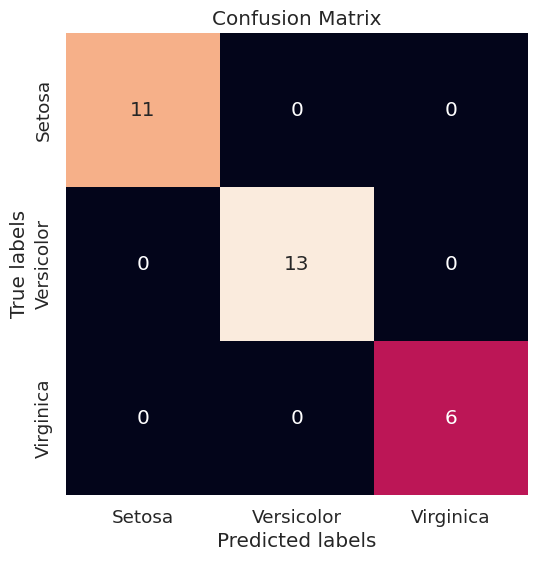

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_custom)
class_names= ['Setosa', 'Versicolor', 'Virginica']
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cbar=False, square=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()